## numpy

*   numpy.ndarray — это многомерный массив
*   как и torch.Tensor хранит данные в виде непрерывного блока с фиксированным типом (например, float64)

**Недостатки numpy.ndarray:**
1.   Нет поддержки GPU: numpy работает только на CPU
2.   Нет автодифференцирования (autograd): numpy не поддерживает автоматическое вычисление градиентов, что критично для глубокого обучения (DL)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# для воспроизводимости (чтобы у всех числа одинаковые генерились)
np.random.seed(62)

In [12]:
n_samples = 100 # 100 обучающих примеров
x = np.random.randint(-10, 10, (n_samples, 1))
y = x*2 # научим нашу модель умножать на 2 (можно вставить любое линейное преобразование, нап, 2x + 333x)

In [13]:
x.shape, y.shape

((100, 1), (100, 1))

In [14]:
# вопрос: зачем инициализировать веса случайным образом?
# ответ: если веса изначально все одинаковые, то и обновляться они все будут одинаково и мы ничего не выучим

# вопрос: зачем умножать на 0.01?
# ответ: чтобы в начале обучения не произошел взрыв градиента (gradient explosion)
# (когда выход модели слишком большой или слишком маленький)
w = np.random.randn(1, 1) * 0.01
# на самом деле существуют различные инициализации, например, Xavier и другие
# но для демонстрации возьмем этот способ
w, w.shape

(array([[-0.00335575]]), (1, 1))

In [15]:
# нам хватает рандомности в w и мы не хотим вносить какую-то лишнюю информацию, поэтому инициализируем нулем
b = 0.0
# "скорость обучения" - гиперпараметр (который надо подбирать руками) - чем больше, тем сильнее шагаем в градиентном спуске
learning_rate = 0.01
# одна эпоха - это полный проход по нашим данным и обновление весов
# за одну эпоху, наша модель "видит" все обучающие данные (всю трейн выборку)
epochs = 1000

In [16]:
# модель - однослойная нейронная сеть (линейная регрессия)
def forward(x, w, b):
  return np.dot(x, w) + b # x * w + b

# так как задача - регрессия (предсказываем какую-то неограниченную чиселку), то используем MSELoss
def mse_loss(y_pred, y):
  return np.mean((y_pred - y) ** 2)

# производная mse_loss по y_pred
def grad(y_pred, y, n_samples):
  return 2 * (y_pred - y) / n_samples
# вопрос: зачем делим на n_samples?
# ответ: если не делить, то, чем больше примеров, тем больше значение, а нам этого не надо

In [17]:
print(x[0]) # вход (то, что мы подаем в нашу модель для получения ответа)
print(y[0]) # таргет (то, что мы хотим получить в качестве ответа от нашей модели)
forward(x, w, b)[0] # прогоняем нашу модель и получаем ответ (до обучения, он не совпадает с таргетом)

[8]
[16]


array([-0.02684596])

In [18]:
# получаем производную mse_loss по dw (для обновления весов)
# dw: (d_loss / d_y_pred) * (d_y_pred / d_w) = dL * x (скалярное произведение) -> chain rule

# получаем производную mse_loss по db (для обновления баесов (смещений))
# db: (d_loss / d_y_pred) * (d_y_pred / d_b) = dL * 1 (скалярное произведение) -> chain rule

In [ ]:
# Главный вопрос - зачем считать производные лосса по w и по b?
# ответ: производная лосса по параметрам (по w и по b) показывает, как лосс изменяется при изменении w и b
# Знак производной указывает направление роста лосса: если dw > 0, то увеличение w увеличивает лосс, если dw < 0,
# уменьшение w увеличивает лосс
# Значение производной показывает, насколько быстро лосс изменяется при небольшом изменении параметра (w и b)

# НО: наша задача - минимизировать лосс, поэтому мы движемся в противоположном направлении градиента,
# вычитая производную, умноженную на learning_rate: w = w - learning_rate * dw, b = b - learning_rate * db

In [19]:
losses = []
for epoch in range(epochs):
  y_pred = forward(x, w, b) # получаем ответ нашей модели (prediction) - (n_samples, 1)
  loss = mse_loss(y_pred, y) # считаем лосс между prediction и таргетом - одно число
  losses.append(loss)

  dL = grad(y_pred, y, n_samples) # производная mse_loss по y_pred -> (n_samples, 1)
  dw = np.dot(x.T, dL) # (1, n_samples) * (n_samples, 1) -> (1, 1)
  db = np.sum(dL) # скалярное произведение dL с вектором единичек (dL, 1) - одно число

  # градиентный спуск
  w -= learning_rate * dw # -= -> это in-place операция, которая не создает лишний объект w, а изменяет существующий
  b -= learning_rate * db

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, loss: {loss:.8f}')

Epoch: 0, loss: 158.57078692
Epoch: 100, loss: 0.00002495
Epoch: 200, loss: 0.00000046
Epoch: 300, loss: 0.00000001
Epoch: 400, loss: 0.00000000
Epoch: 500, loss: 0.00000000
Epoch: 600, loss: 0.00000000
Epoch: 700, loss: 0.00000000
Epoch: 800, loss: 0.00000000
Epoch: 900, loss: 0.00000000


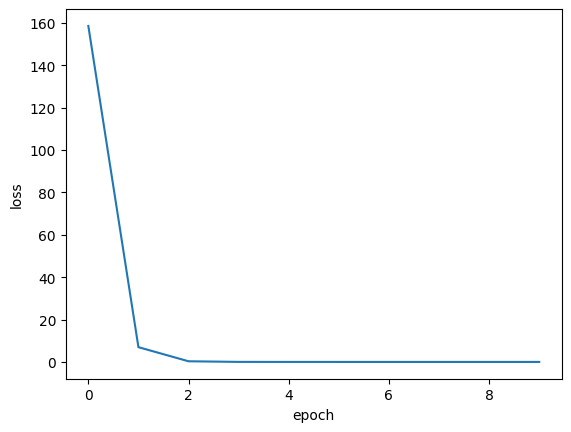

In [20]:
plt.plot(losses[:10])
plt.xlabel('epoch')
plt.ylabel('loss');

In [21]:
# проверим качество нашей модели
x_test = np.array([[5], [6], [7], [3], [2], [1234]])
forward(x_test, w, b)

array([[  10.],
       [  12.],
       [  14.],
       [   6.],
       [   4.],
       [2468.]])

In [22]:
w, b # обученные w и b (как мы и хотели: w = 2, b = 0)

(array([[2.]]), -8.113129571844962e-11)

## torch (реализуем то же самое, но на торче)

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [42]:
np.random.seed(62)

In [43]:
n_samples = 100 # 100 обучающих примеров
x = np.random.randint(-10, 10, (n_samples, 1))
y = x*2 # научим нашу модель умножать на 2 (можно вставить любое линейное преобразование, нап., 2x + 333x)

In [44]:
# создадим тензоры - многомерные массивы из PyTorch
# они поддерживают вычисления на GPU
# есть встроенное автодифференцирование (torch.autograd)
# будем всегда использовать для DL (так как на numpy ничего серьезного не выучишь,
# ввиду того, что обучение будет на CPU)

# существуют несколько способов задать тензор:
# первый - через torch.tensor - создаст тензор с таким типом (численным) данных,
# который вы в него положили (нап, положили int'ы, получите тензор с int'ами)
x = torch.tensor(x, dtype=torch.float32) # явно указываем, что хотим использовать тип torch.float32
y = torch.tensor(y, dtype=torch.float32)

# второй - через torch.Tensor - создаст тензор с типом float32,
# то есть к входным данным применится неявное приведение типов (что иногда может быть не задумано)

In [45]:
x.dtype, x.shape

(torch.float32, torch.Size([100, 1]))

In [46]:
#nn.Module — это базовый класс в PyTorch,
# который используется для создания всех нейронных сетей и их компонентов
# Когда вы наследуетесь от nn.Module (пишете, нап, class SimpleNN(nn.Module)),
# вы получаете доступ к возможностям торча, которые упрощают создание, обучение и использование моделек
# Что дает nn.Module:
# 1) управление параметрами модели # без nn.Module пришлось бы вручную хранить и обновлять все веса, что неудобно
# 2) автоматическая поддержка forward и backward
# 3) удобство работы с GPU # nn.Module предоставляет метод .to(device) (нап, .to('cuda') - переносит на GPU)
# 4) интеграция с оптимизаторами # можно просто передать model.parameters() в оптимизатор и балдеть

# self.что-то -> атрибуты класса
class SimpleNN(nn.Module): # наследуемся от nn.Module
  def __init__(self, in_feat, out_feat):
    super(SimpleNN, self).__init__() # вызываем конструктор родительского класса (nn.Module)
    # что здесь написано? (super(...)):
    # выполнить метод .__init__() родительского класса nn.Module
    # для конкретного объекта класса SimpleNN (нашей модельки)

    # создаем один линейный слой (по факту - линейная регрессия)
    # in_features - количество входных фичей (у нас - одна фича: просто само число входное)
    # out_features - количество выходных фичей (у нас - одна фича (число): хотим, чтобы это было входное число * 2)
    # по умолчанию в nn.Linear bias равен True, но я явно это прописал
    self.linear = nn.Linear(in_features=in_feat, out_features=out_feat, bias=True) # x * w + b

  # метод forward будет вызываться, когда будем делать так: model(input_data)
  def forward(self, x): # x - это входные данные (input_data)
    return self.linear(x)

In [47]:
# создаем модельку
model = SimpleNN(in_feat=1, out_feat=1)

In [48]:
# можем посмотреть количество обучаемых(на будущее) параметров (здесь 2 - w и b)
print(sum([p.numel() for p in model.parameters() if p.requires_grad]))

# можно также посмотреть общее количество параметров (здесь тоже будет 2)
sum([p.numel() for p in model.parameters()])

2


2

In [49]:
# задаем MSELoss
loss_fn = nn.MSELoss()
# задаем оптимизатор - здесь используем SGD (stochastic gradient descent)
optim = torch.optim.SGD(model.parameters(), lr=0.01) # передаем в оптимизатор параметры модели и learning_rate

# оптимизаторов на самом деле много и если не знаете, что взять, берите Adam, AdamW (и мне нравится NAdam)
# подробнее про оптимизаторы - на 2 занятии

In [50]:
# чтобы достать число из тензора, можно сделать tensor.item()
a = torch.tensor([9.9838])
a.item()

9.983799934387207

In [51]:
epochs = 1000
losses = []
for epoch in range(epochs):
  # (на будущее) если у вас есть Dropout или BatchNorm (или что-то еще, зависящее,
  # находится ли модель в режиме обучения или нет), то нужно прописать model.train() - лучше всегда пишите
  model.train()
  y_pred = model(x) # получаем предсказание от модели
  loss = loss_fn(y_pred, y) # считаем лосс
  losses.append(loss.item())

  # градиентный спуск (мантра, которую нужно запомнить)
  optim.zero_grad() # cбрасывает (обнуляет) градиенты всех параметров модели, которые отслеживаются оптимизатором
  loss.backward() # вычисляет градиенты функции потерь (лосса) по всем параметрам модели, у которых установлен флаг requires_grad=True, и сохраняет их в атрибуте .grad
  optim.step() # делает шаг градиентного спуска

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, loss: {loss.item():.8f}')

Epoch: 0, loss: 103.63424683
Epoch: 100, loss: 0.01480863
Epoch: 200, loss: 0.00027473
Epoch: 300, loss: 0.00000510
Epoch: 400, loss: 0.00000009
Epoch: 500, loss: 0.00000000
Epoch: 600, loss: 0.00000000
Epoch: 700, loss: 0.00000000
Epoch: 800, loss: 0.00000000
Epoch: 900, loss: 0.00000000


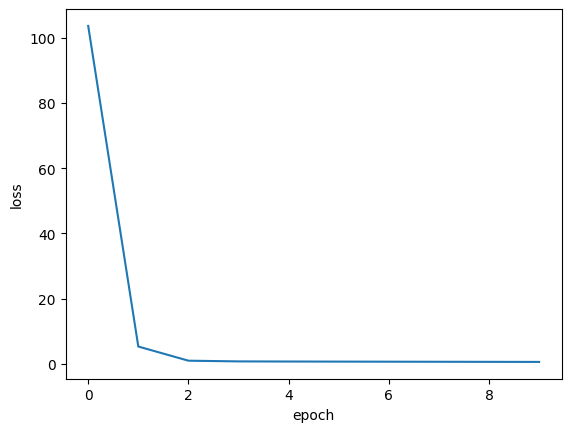

In [52]:
plt.plot(losses[:10])
plt.xlabel('epoch')
plt.ylabel('loss');

In [53]:
# проверим качество нашей обученной модельки
x_test = torch.tensor([[2], [3], [4], [5], [1000]], dtype=torch.float32)
model(x_test)

tensor([[   4.],
        [   6.],
        [   8.],
        [  10.],
        [2000.]], grad_fn=<AddmmBackward0>)